In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('C:/Users/SIDY BOY!/Desktop/UTD/Projects/practicing ML/credit_card_fraud_detection/creditcard.csv')

# Data Exploration

In [160]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



# Data preprocessing

In [161]:
from sklearn.preprocessing import StandardScaler

In [162]:
scaler= StandardScaler()
df['Normalized_Amount']= scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df= df.drop(columns=['Amount'])

In [163]:
df=df.drop(columns=['Time'])

In [164]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


### spliting into x and y

In [210]:
x= df.iloc[:,df.columns != 'Class']
y= df.iloc[:, df.columns == 'Class']

In [211]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [212]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [213]:
from sklearn.metrics import accuracy_score

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=0)

In [215]:
y_train

,Class
194763,0
135660,0
259186,0
87387,0
267282,0
...,...
211543,0
86293,0
122579,0
152315,0


##  Deep learning- using layers: Dense, Dropout; activations: ReLu, Sigmoid

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [17]:
model= Sequential([
    Dense(units=16, input_dim= 29, activation= 'relu'),
    Dense(units=20, input_dim=29, activation= 'relu'),
    Dense(units=24, input_dim=29, activation= 'relu'),
    Dropout(0.5),
    Dense(units=20, input_dim=29, activation= 'relu'),
    Dense(units=1,input_dim=29, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
______________________________________________________

In [19]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs= 5)

Epoch 1/5
14241/14241 [==============================] - 19s 1ms/step - loss: 0.0082 - accuracy: 0.9988
Epoch 2/5
14241/14241 [==============================] - 17s 1ms/step - loss: 0.0040 - accuracy: 0.9993 0s -
Epoch 3/5
14241/14241 [==============================] - 17s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
14241/14241 [==============================] - 16s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
14241/14241 [==============================] - 16s 1ms/step - loss: 0.0033 - accuracy: 0.9994


In [20]:
score= model.evaluate(x_test,y_test)

2226/2226 [==============================] - 2s 767us/step - loss: 0.0036 - accuracy: 0.9994


In [21]:
score

[0.0036474205553531647, 0.9994101524353027]

In [22]:
y_pred= model.predict(x_test)
y_test= pd.DataFrame(y_test)

In [23]:
y_pred

array([[2.4613394e-07],
       [1.1344431e-05],
       [8.8390007e-05],
       ...,
       [3.5783920e-08],
       [8.0520884e-08],
       [1.2205126e-10]], dtype=float32)

In [24]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

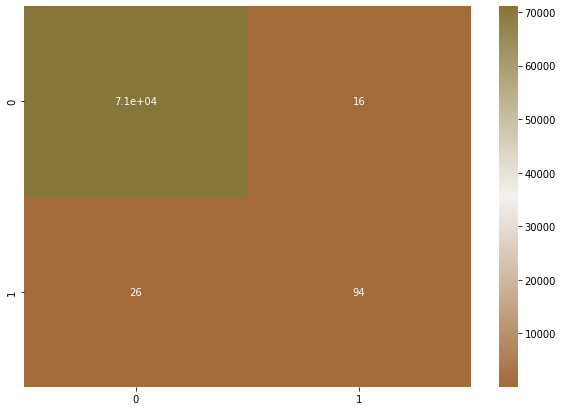

In [25]:
cm= confusion_matrix(y_test,y_pred.round())
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(40,70,as_cmap=True))

### confusion matrix of original data set(without splitting) 

<AxesSubplot:>

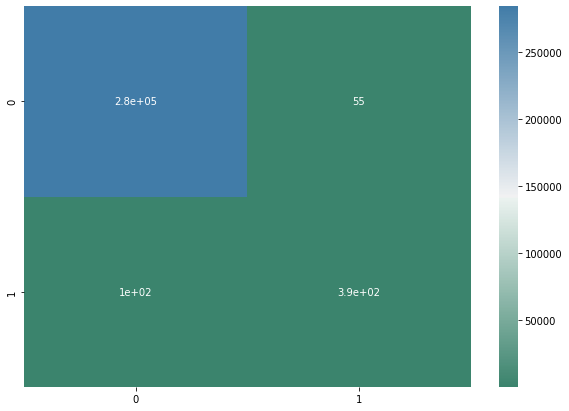

In [26]:
y_pred= model.predict(x)
y_expected= pd.DataFrame(y)
cm= confusion_matrix(y_expected, y_pred.round())
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot= True, cmap= sns.diverging_palette(160,240, as_cmap=True))

## logistic regression with only cross validation

In [216]:
from sklearn.linear_model import LogisticRegressionCV

In [217]:
lgcv_model= LogisticRegressionCV(Cs=1, cv= 7, max_iter=100, verbose=2, refit=True, random_state=None)
lgcv_model.fit(x_train,y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.0s finished


LogisticRegressionCV(Cs=1, cv=7, verbose=2)

In [124]:
y_pred_lgcv= lgcv_model.predict(x_test)

In [125]:
accuracy_score(y_test,y_pred_lgcv)

0.9985674559703379

<AxesSubplot:>

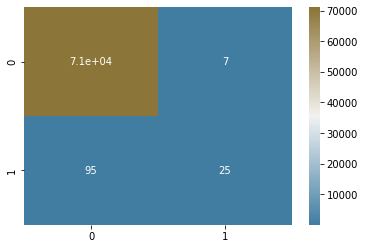

In [31]:
cm= confusion_matrix(y_test,y_pred_lgcv)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(235,65, as_cmap= True))

## logistic regression  

In [127]:
from sklearn.linear_model import LogisticRegression

In [135]:
type(y_train)

pandas.core.frame.DataFrame

In [129]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train.values.ravel())

c:\users\sidy boy!\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
y_pred_lg= lg_model.predict(x_test)

<AxesSubplot:>

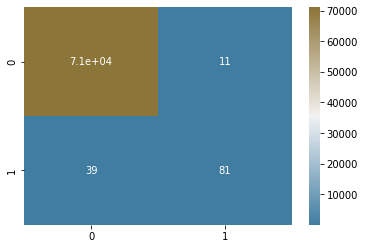

In [35]:
cm= confusion_matrix(y_test,y_pred_lg)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(235,65, as_cmap= True))

In [36]:
accuracy_score(y_test,y_pred_lg)

0.9992977725344794

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_rf= RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train.values.ravel())

RandomForestClassifier()

In [39]:
y_pred_rf= model_rf.predict(x_test)

<AxesSubplot:>

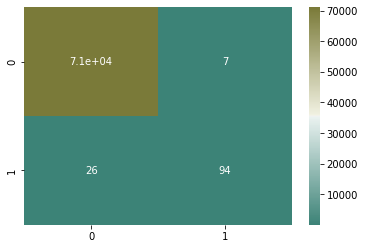

In [40]:
cm= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot= True, cmap= sns.diverging_palette(534,86, as_cmap=True) )

In [41]:
accuracy_score(y_test,y_pred_rf)

0.9995365298727564

## Decision tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
decisiontree= DecisionTreeClassifier()
decisiontree.fit(x_train,y_train.values.ravel())

DecisionTreeClassifier()

In [44]:
y_pred_dt= decisiontree.predict(x_test)

<AxesSubplot:>

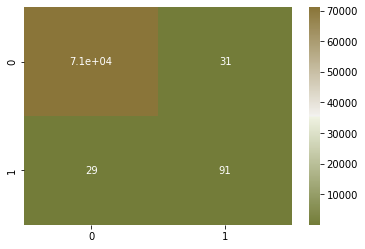

In [45]:
cm= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, cmap= sns.diverging_palette(454,67, as_cmap= True))

In [46]:
accuracy_score(y_test,y_pred_dt)

0.9991573270413753

## Under-Sampling 

In [165]:
fraud_indices = np.array( df[df.Class==1].index)

In [166]:
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [167]:
no_of_frauds= len(fraud_indices)

In [168]:
no_of_frauds

492

In [169]:
nonfraud_indices= df[df.Class ==0].index

In [170]:
nonfraud_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [171]:
random_nonfraud_indices= np.random.choice(nonfraud_indices,no_of_frauds,replace=False)
random_nonfraud_indices= np.array(random_nonfraud_indices)

In [172]:
len(random_nonfraud_indices)

492

In [173]:
undersample_indices= np.concatenate([fraud_indices, random_nonfraud_indices])

In [174]:
undersample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [175]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313249


In [176]:
undersampled_df= df.iloc[undersample_indices,:]

In [177]:
undersampled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105716,-0.930967,1.084174,2.072396,0.829735,0.173046,-0.254572,0.944133,-0.083537,-0.634016,-0.629703,...,0.009136,0.238345,-0.309239,0.652462,0.534336,-0.327959,-0.018271,0.055399,0,-0.223292
109163,1.214440,-0.700135,-1.635909,-2.477385,1.739408,2.748051,-0.381446,0.653303,0.977223,-0.985463,...,-0.186029,-0.794721,-0.080644,1.032342,0.559862,-0.118347,-0.023645,0.022328,0,0.020112
87465,-1.225982,0.716383,2.236727,-0.105816,0.223243,0.892217,-0.139608,-0.662040,0.530414,-0.149408,...,0.794970,0.068989,-0.167624,-0.311061,0.109022,-0.594281,-0.444013,-0.172775,0,-0.333279
256465,-0.172748,-0.686847,1.097933,-2.747662,-0.710979,0.074118,-0.409461,0.174863,-2.109763,0.867874,...,0.004635,0.292610,0.009935,0.657561,-0.425619,-0.266951,0.147781,0.157570,0,-0.181312


In [178]:
undersample_x = undersampled_df.iloc[:,undersampled_df.columns!= 'Class']
undersample_y = undersampled_df.iloc[:, undersampled_df.columns== 'Class']

In [179]:
x_train,x_test,y_train,y_test= train_test_split(undersample_x,undersample_y, train_size=.8)

In [180]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)


In [209]:
y_train

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

##  Deep Learning on Undersampled data using the above model

In [181]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
______________________________________________________

In [182]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs= 5)

Epoch 1/5
53/53 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9975
Epoch 2/5
53/53 [==============================] - 0s 1ms/step - loss: 2.6067e-04 - accuracy: 1.0000
Epoch 3/5
53/53 [==============================] - 0s 1ms/step - loss: 1.8475e-04 - accuracy: 1.0000
Epoch 4/5
53/53 [==============================] - 0s 1ms/step - loss: 1.6235e-04 - accuracy: 1.0000
Epoch 5/5
53/53 [==============================] - 0s 2ms/step - loss: 1.1911e-04 - accuracy: 1.0000


In [183]:
score= model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 6.4853e-05 - accuracy: 1.0000


In [184]:
score

[6.485302583314478e-05, 1.0]

In [185]:
y_pred= model.predict(x_test)
y_test= pd.DataFrame(y_test)

<AxesSubplot:>

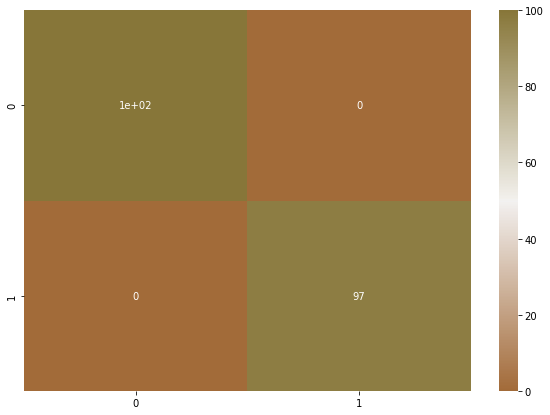

In [186]:
cm= confusion_matrix(y_test,y_pred.round())
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(40,70,as_cmap=True))

## confusion matrix of original data set(without splitting) 

<AxesSubplot:>

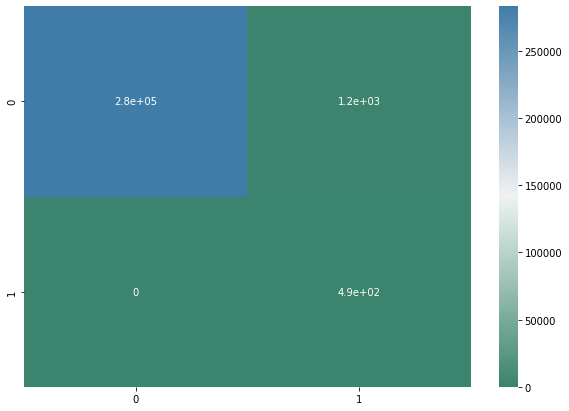

In [187]:
y_pred= model.predict(x)
y_expected= pd.DataFrame(y)
cm= confusion_matrix(y_expected, y_pred.round())
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot= True, cmap= sns.diverging_palette(160,240, as_cmap=True))

## logistic regression  

In [188]:
from sklearn.linear_model import LogisticRegression

In [192]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train.ravel())

LogisticRegression()

In [193]:
y_pred_lg= lg_model.predict(x_test)

<AxesSubplot:>

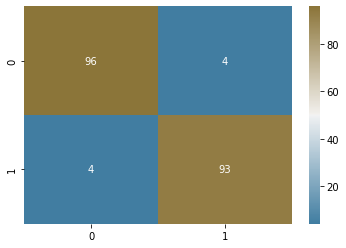

In [194]:
cm= confusion_matrix(y_test,y_pred_lg)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(235,65, as_cmap= True))

In [195]:
accuracy_score(y_test,y_pred_lg)

0.9593908629441624

## Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
model_rf= RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train.ravel())

RandomForestClassifier()

In [201]:
y_pred_rf= model_rf.predict(x_test)

<AxesSubplot:>

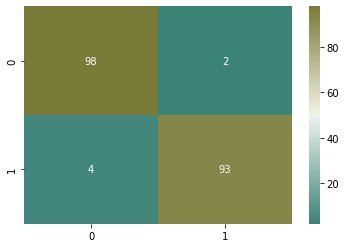

In [202]:
cm= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot= True, cmap= sns.diverging_palette(534,86, as_cmap=True) )

In [203]:
accuracy_score(y_test,y_pred_rf)

0.9695431472081218

## Decision tree 

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
decisiontree= DecisionTreeClassifier()
decisiontree.fit(x_train,y_train.ravel())

DecisionTreeClassifier()

In [206]:
y_pred_dt= decisiontree.predict(x_test)

<AxesSubplot:>

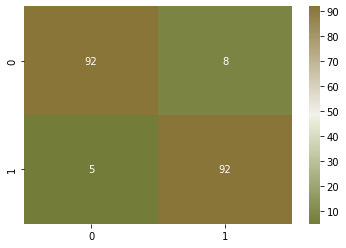

In [207]:
cm= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, cmap= sns.diverging_palette(454,67, as_cmap= True))

In [208]:
accuracy_score(y_test,y_pred_dt)

0.934010152284264

## Oversampling using SMOTE

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
x_oversample, y_oversample= SMOTE().fit_resample(x,y.values.ravel())

In [72]:
x_oversample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-14.266332,7.631107,-15.176387,8.493939,-12.397859,-2.857451,-14.444341,9.086297,-7.913971,-13.437259,...,-1.212169,2.864451,0.225627,-0.477675,0.635790,0.511563,0.182102,-1.504177,-0.863971,0.144063
568626,-0.936438,4.752753,-6.752356,6.571785,0.458765,-3.272588,-2.178696,0.774286,-3.197998,-6.600078,...,0.458790,0.495313,-0.548639,-0.488605,-0.026209,1.311439,0.477511,0.615987,0.437306,-0.349231
568627,0.789755,0.813004,0.000476,1.938679,0.291341,0.428398,-0.491977,-1.028731,-0.461736,-0.172530,...,0.183253,-0.605202,0.034471,-0.111614,-0.872863,0.560085,0.014037,0.084641,0.134316,-0.349647
568628,-1.918202,4.944541,-5.947456,5.679150,1.255839,-2.943318,-1.905150,0.298882,-3.960482,-7.367995,...,0.624438,0.468896,-0.325940,-0.818419,-0.308559,1.013765,0.333082,0.880295,0.577094,-0.349231


In [83]:
x_train,x_test,y_train,y_test= train_test_split(x_oversample,y_oversample, train_size=.8)

In [84]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)


##  Deeplearning

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                340       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,845
Trainable params: 1,845
Non-trainable params: 0
______________________________________________________

In [86]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=15,epochs= 5)

Epoch 1/5
30327/30327 [==============================] - 36s 1ms/step - loss: 0.0064 - accuracy: 0.9986
Epoch 2/5
30327/30327 [==============================] - 35s 1ms/step - loss: 0.0061 - accuracy: 0.9987
Epoch 3/5
30327/30327 [==============================] - 35s 1ms/step - loss: 0.0057 - accuracy: 0.9988
Epoch 4/5
30327/30327 [==============================] - 35s 1ms/step - loss: 0.0056 - accuracy: 0.9988
Epoch 5/5
30327/30327 [==============================] - 35s 1ms/step - loss: 0.0053 - accuracy: 0.9989


In [87]:
score= model.evaluate(x_test,y_test)

3554/3554 [==============================] - 3s 792us/step - loss: 0.0063 - accuracy: 0.9983


In [88]:
score

[0.006260358728468418, 0.9983469247817993]

In [89]:
y_pred= model.predict(x_test)
y_test= pd.DataFrame(y_test)

<AxesSubplot:>

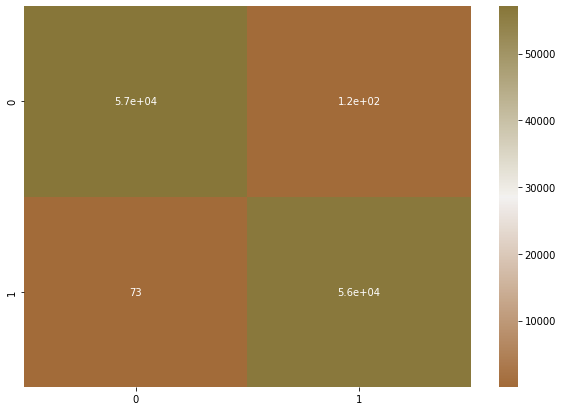

In [90]:
cm= confusion_matrix(y_test,y_pred.round())
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(40,70,as_cmap=True))

## logistic regression  

In [91]:
from sklearn.linear_model import LogisticRegression

In [93]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [94]:
y_pred_lg= lg_model.predict(x_test)

<AxesSubplot:>

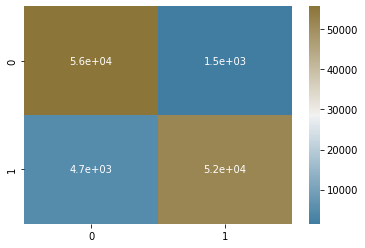

In [95]:
cm= confusion_matrix(y_test,y_pred_lg)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(235,65, as_cmap= True))

In [96]:
accuracy_score(y_test,y_pred_lg)

0.9459754145929691

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model_rf= RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred_rf= model_rf.predict(x_test)

<AxesSubplot:>

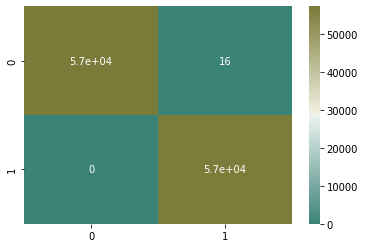

In [101]:
cm= confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm, annot= True, cmap= sns.diverging_palette(534,86, as_cmap=True) )

In [102]:
accuracy_score(y_test,y_pred_rf)

0.9998593109755025

## Decision tree 

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
decisiontree= DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)

DecisionTreeClassifier()

In [106]:
y_pred_dt= decisiontree.predict(x_test)

<AxesSubplot:>

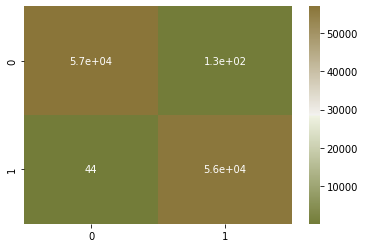

In [107]:
cm= confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm, annot=True, cmap= sns.diverging_palette(454,67, as_cmap= True))

In [108]:
accuracy_score(y_test,y_pred_dt)

0.998478799922621